<a href="https://colab.research.google.com/github/gabriela-148/AI/blob/main/Assignment_5/Assignment5_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gabriella Huegel**

**Assignment 5 Report**

**CSC362**


**3/28/24**
# **Problem 1**

For this assignment, I referred to the func_optimality Juptyer notebook and my notes from lecture.

The very first step I took was to install and load the GA and plotting libraries.

In [42]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [43]:
# Loading necessary libaries
library(GA)
library(plotly)
library(ggplot2)


After this, I started to create the functions related to the cross section area and static deflection. I referred to the equations listed in the assignment decsription.

In [44]:
 # Define the functions func1 and func2

 # Cross section area equation
func1 <- function(x) {
  2 * x[2] * x[4] + x[3] * (x[1] - 2 * x[4])
}

# Static Deflation equation
func2 <- function(x) {
  60000 / (x[3] * (x[1] - 2 * x[4])^3 + 2 * x[2] * x[4] * (4 * (x[4])^2 + 3 * x[1] * (x[1] - 2 * x[4])))
}

After these functions were created, I could use them to start the GA to find the best minimization for both functions.

To do this, I created the weighted_fitness function that represents the F = a *f1 + b * f2, and set up the GA parameters. I started out using the weight values as 0.7 for a and 0.3 for b since the sum of a and b must equal 1.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -50.93435 
Solution = 
           x1       x2       x3       x4
[1,] 30.45556 10.75967 1.507575 1.438338

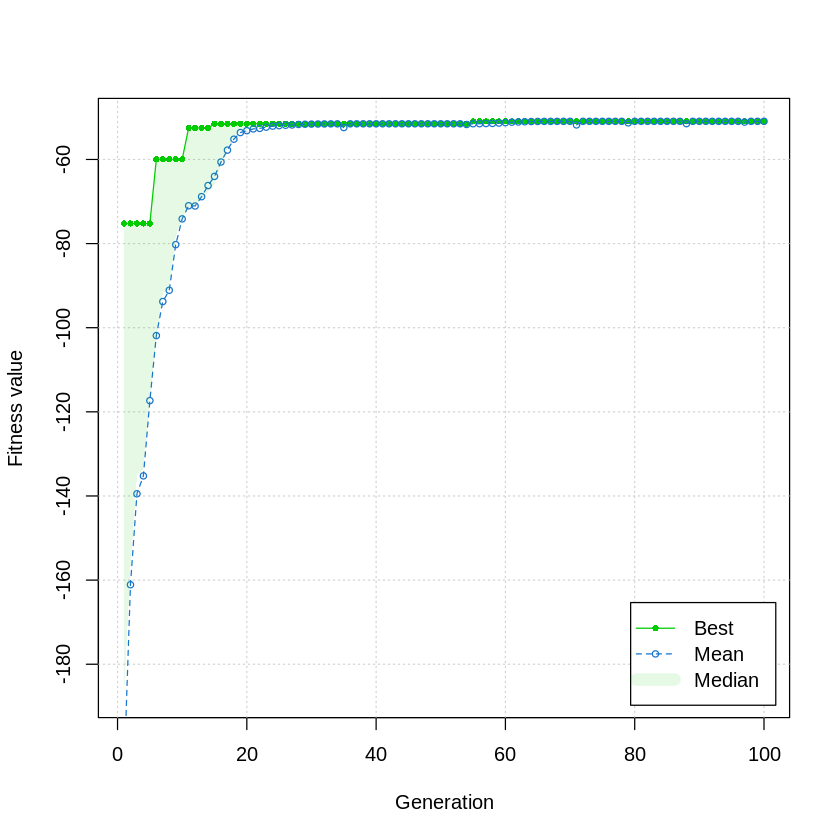

In [45]:
# Define weighted fitness function
weighted_fitness <- function(x, a, b) {
  f1 <- -func1(x)
  f2 <- -func2(x)
  return(a * f1 + b * f2)
}

# Set up GA parameters
numGenerations <- 100
populationSize <- 50
Pc <- 0.75
Pm <- 0.001
a <- 0.7  # Weight for the first function
b <- 0.3  # Weight for the second function

# Run GA
GA <- ga(type = "real-valued",
         fitness = function(x) weighted_fitness(x, a, b),  # Minimize the weighted fitness
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5, 5),  # Define bounds for x1, x2, x3, x4
         popSize = populationSize, maxiter = numGenerations, run = 100,
         pcrossover = Pc, pmutation = Pm)

# Summary and plot
summary(GA)
plot(GA)


After plotting these fitness values, I can see that there was a lot of oscallation occurring in the earlier generations of the algorithm. I can also see that the average fitness values are significantly lower than the best fitness values until it reaches a convergence point.

From these values, I can infer that the algorithm mutated every 5 generations or so and the mutation was overall beneficial to the algorithm since the average and best fitness values got closer together.

Next, I executed the algorithm using different weights. A = 0.5 and B = 0.5. The sum of these values are 1 and the weight is split evenly among the functions.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -34.29865 
Solution = 
           x1       x2      x3       x4
[1,] 14.95493 17.70598 1.37194 1.410637

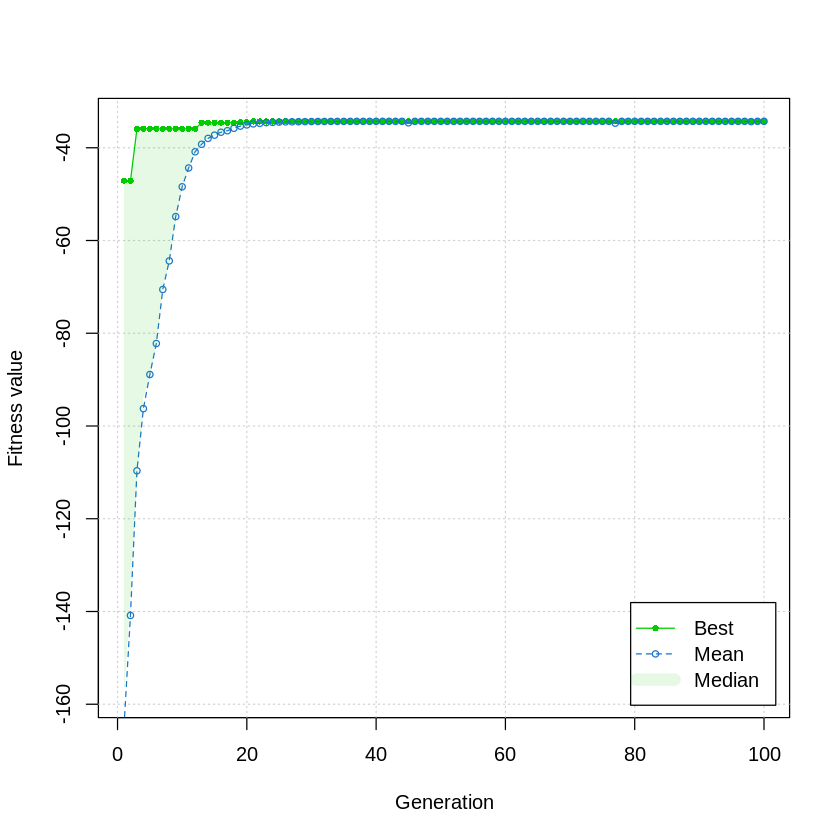

In [52]:
# Define weighted fitness function
weighted_fitness <- function(x, a, b) {
  f1 <- -func1(x)
  f2 <- -func2(x)
  return(a * f1 + b * f2)
}

# Set up GA parameters
numGenerations <- 100
populationSize <- 50
Pc <- 0.75
Pm <- 0.001
a <- 0.5  # Weight for the first function
b <- 0.5  # Weight for the second function

# Run GA
GA <- ga(type = "real-valued",
         fitness = function(x) weighted_fitness(x, a, b),  # Minimize the weighted fitness
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5, 5),  # Define bounds for x1, x2, x3, x4
         popSize = populationSize, maxiter = numGenerations, run = 100,
         pcrossover = Pc, pmutation = Pm)

# Summary and plot
summary(GA)
plot(GA)


I saw drastic differences in this algorithm versus the previous one. I noticed there was a bigger difference in the best and average fitness values. Given that the weight was evenly distributed among the two functions, the variation between generations was very little but there were still improvements. I also noticed that the overall best fitness value was -34, while the fitness value before was -50. I believe this happened because as the algorithm was going through each generation with an even distribution of weight, it relied more on the actual fitness calculations, and the functions were evenly adjusted.

After this, I wanted to see how having the static deflection function with a higher weight would affect the algorithm. So A = 0.3 and B = 0.7.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -19.43218 
Solution = 
          x1       x2       x3       x4
[1,] 17.9032 16.34992 1.175443 1.325521

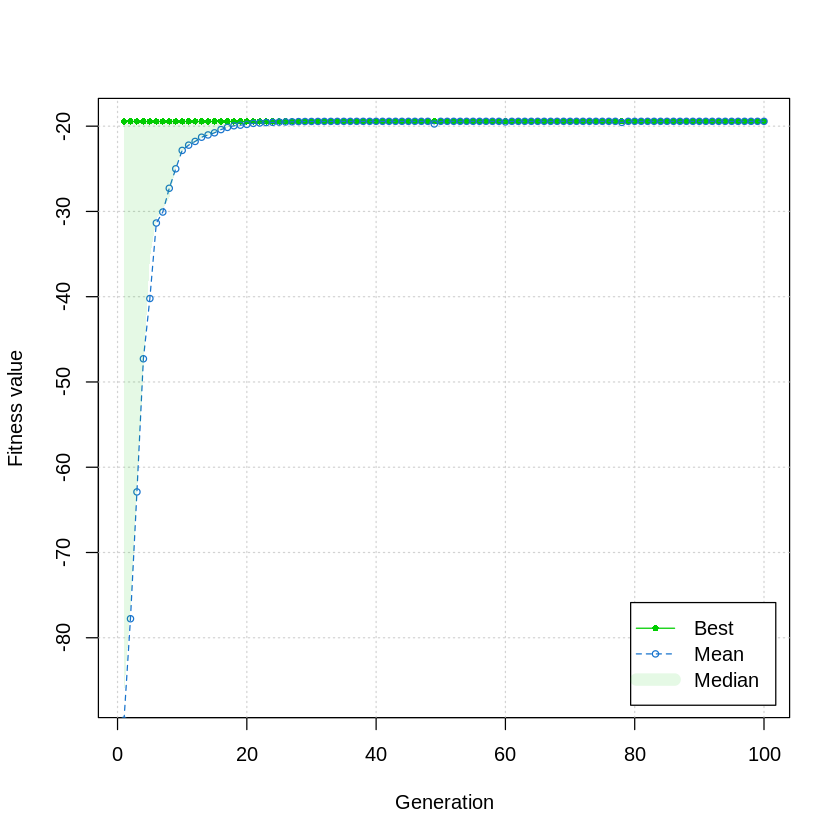

In [54]:
# Define weighted fitness function
weighted_fitness <- function(x, a, b) {
  f1 <- -func1(x)
  f2 <- -func2(x)
  return(a * f1 + b * f2)
}

# Set up GA parameters
numGenerations <- 100
populationSize <- 50
Pc <- 0.75
Pm <- 0.001
a <- 0.3  # Weight for the first function
b <- 0.7  # Weight for the second function

# Run GA
GA <- ga(type = "real-valued",
         fitness = function(x) weighted_fitness(x, a, b),  # Minimize the weighted fitness
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5, 5),  # Define bounds for x1, x2, x3, x4
         popSize = populationSize, maxiter = numGenerations, run = 100,
         pcrossover = Pc, pmutation = Pm)

# Summary and plot
summary(GA)
plot(GA)


In this result, I was very surprised to see what happened. As you can see the best fitness values remained consistent throughout the entire algorithm. I also noticed the average fitness values had more of an apparent curve as the generations went on.

In this equation the best fitness value calculated was -19, which is the lowest value seen so far. However, it is the most consistent values that the algorithm has produced.

Given these outputs from the genetic algorithm, I believe that the best optimizaiton function to minimize both static deflection and cross section would be 0.7 * f1 + 0.3 * f2.

I believe this is the best solution because the lowest fitness value came from this function. The purpose of this algorithm was to minimize both f1 and f2, given that this fitness value produced was the highest negative value, this function would be the one that minimizes both static deflection and cross section of a beam.